# 03.11 Initial loyalty_status, family_ status visualizations

### This script contains the following points:

### 1. Import libraries and files
### 2. Create histogram of order_time column
### 3. Create a bar chart from the loyalty_flag column
### 4. Create a line chart of prices by order_time
### 5. Create a line chart of connection between age and dependants
### 6. Create a scatterplot of the connection between age and income

### 1. Import libraries and files

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import file

path = r'C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 4\05-10-2023 Instacart Basket Analysis'

In [4]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
ords_prods_cust.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [6]:
pd.options.display.max_columns = None

### 2. Create histogram of order_time column

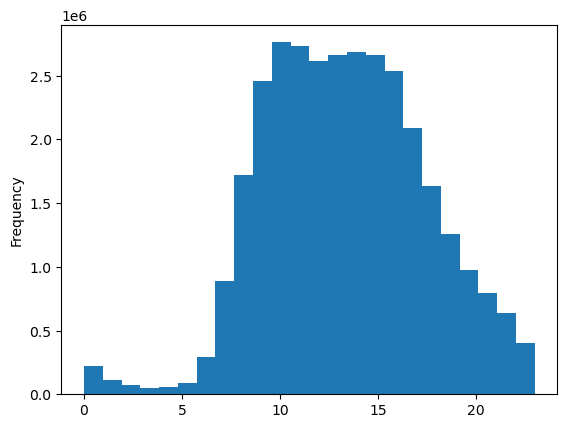

In [7]:
# Create histogram

hist = ords_prods_cust['order_time'].plot.hist(bins = 24)

#### The histogram demonstrates the busiest time of day is between 9:00 and 15:00. (This is visualizing the data from the order_time column, confirmed by the categories from the busiest_period_of_day column.)

### 3. Create a bar chart from the loyalty_flag column

[Text(0, 0, '15,876,776'), Text(0, 0, '10,284,093'), Text(0, 0, '6,243,990')]

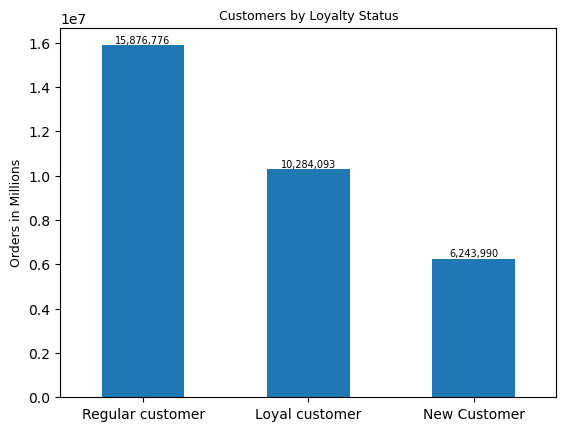

In [10]:
# Create bar chart

bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

# Set x-axis labels
bar.set_xticklabels(labels=['Regular customer','Loyal customer','New Customer'], rotation=0)

# Remove label for x-axis
bar.set(xlabel=None)
  
# Set label for y-axis
bar.set_ylabel( "Orders in Millions" , size = 9 )
  
# Set title for plot
bar.set_title( "Customers by Loyalty Status" , size = 9 )

# Bar labels
bar.bar_label(bar.containers[0], fmt='{:,.0f}', size = 7)

### 4. Create a line chart of prices by order_time

In [6]:
# Create a sample of the dataset by splitting it into 2 groups, 30% and 70% of records

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [7]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [8]:
big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [11]:
# Test the creation of the 2 groups

len (ords_prods_cust)

32404859

In [12]:
len (big) + len (small)

32404859

In [9]:
# Narrowing the sample further with just columns needed (order_time, prices)

df_2 = small[['order_time','prices']]

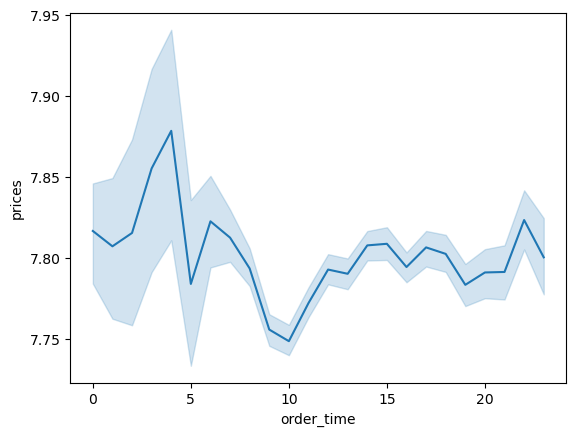

In [10]:
# Create line chart

line_2 = sns.lineplot(data = df_2, x = 'order_time',y = 'prices')

### 4. Create a line chart of connection between age and dependants

In [12]:
# Designate new dataframe for the necessary columns in the sample

df_3 = small[['age','n_dependants']]

In [21]:
# Check values in n_dependant column

df_3['n_dependants'].value_counts(dropna = False)

3    2438634
0    2430491
2    2426844
1    2425129
Name: n_dependants, dtype: int64

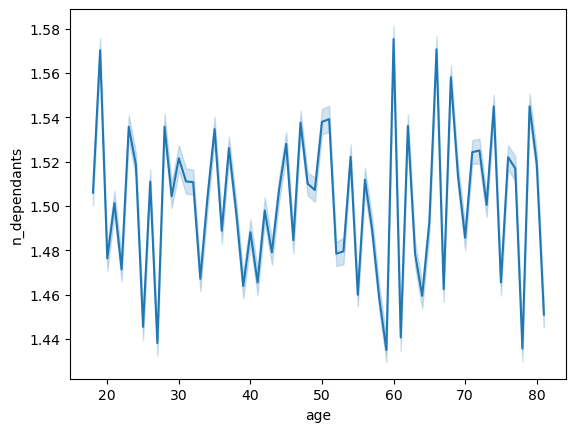

In [13]:
# Create line chart

line = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

#### There doesn't appear to be a connection between age and number of dependants that would be useful for targeted marketing campaigns.

### 5. Create a scatterplot of the connection between age and income

In [18]:
# Designate new dataframe for the necessary columns in the sample

df_4 = small[['age','income']]

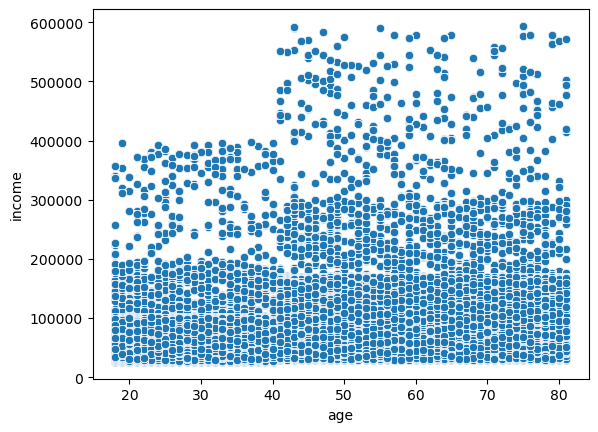

In [20]:
# Create scatterplot

plt = sns.scatterplot(x = 'age', y = 'income', data = df_4)

#### The scatterplot shows a connection between spending power and age: increased age corresponds to increased income.

In [35]:
# Export visualizations

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_time.png'))

In [12]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [15]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [46]:
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

In [14]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_time.png'))